# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
# Check for NaN samples
print(f"There are {df.isna().sum().sum()} null samples.")
df = df.dropna()

There are 0 null samples.


## Exploratory data analysis

### Visualising and clarifying the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df["Label"] = df.Class.map({1: "Fraud", 0: "Not fraud"})
df = df.drop(["Class"], axis=1)

We replace the ambiguous `Class` column with a new `Label` column for clearer labeling of fraud.

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,Not fraud
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,Not fraud
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,Not fraud
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,Not fraud
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,Not fraud


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Balance in the dataset

In [8]:
num_fraud = df[df.Label == "Fraud"].shape[0]
num_total = df.shape[0]

print(f"Total number of entries = {num_total}")
print(f"Total number of frauds = {num_fraud}")
print(f"Percentage of frauds = {num_fraud / num_total * 100:.5f}%")

Total number of entries = 284807
Total number of frauds = 492
Percentage of frauds = 0.17275%


This shows that the dataset is highly imbalanced, with only 0.17% of the transactions being fraudulent.

### Analysing the transaction times

Text(0.5, 1.0, 'Distribution of transaction times')

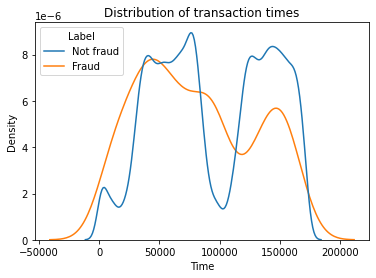

In [9]:
sns.kdeplot(data=df, x="Time", hue="Label", common_norm=False)
plt.title("Distribution of transaction times")

The `Time` column does not have any apparent pattern that we can work with, and can thus be safely dropped.

In [10]:
df = df.drop(["Time"], axis=1)

### Analysing the transaction amounts

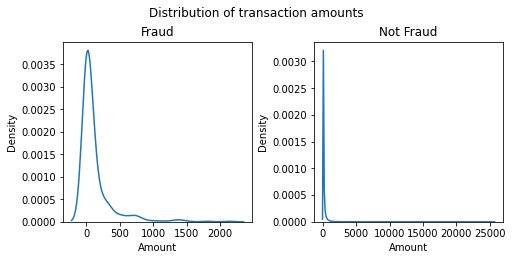

Max transaction amount = 25691.16
Max fraudulent amount = 2125.87


In [11]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5), constrained_layout=True)

sns.kdeplot(data=df[df.Label == "Fraud"], x="Amount", ax=axs[0])
axs[0].set_title("Fraud")

sns.kdeplot(data=df[df.Label != "Fraud"], x="Amount", ax=axs[1])
axs[1].set_title("Not Fraud")

fig.suptitle("Distribution of transaction amounts")
plt.show()

max_amount = df.Amount.max()
max_fraud = df[df.Label == "Fraud"].Amount.max()
print(f"Max transaction amount = {max_amount}")
print(f"Max fraudulent amount = {max_fraud}")

This shows that the transaction amounts are highly skewed towards the left, with most of them lying close to zero.

Further, the maximum amount among the fraudulent transactions is much less than the other transactions, with the former being around one-tenth of the latter.

### Analysing the (principal) components

Finally, we compare the distributions of fraud and non-fraud transactions for each (PCA) component, as provided in the dataset. This replaces the usual pair plot, as
1. It is time-consuming and computationally intensive to plot a $28\times28$ pair plot, and
2. Since they are specified to be the principal components, we know they are uncorrelated with each other.

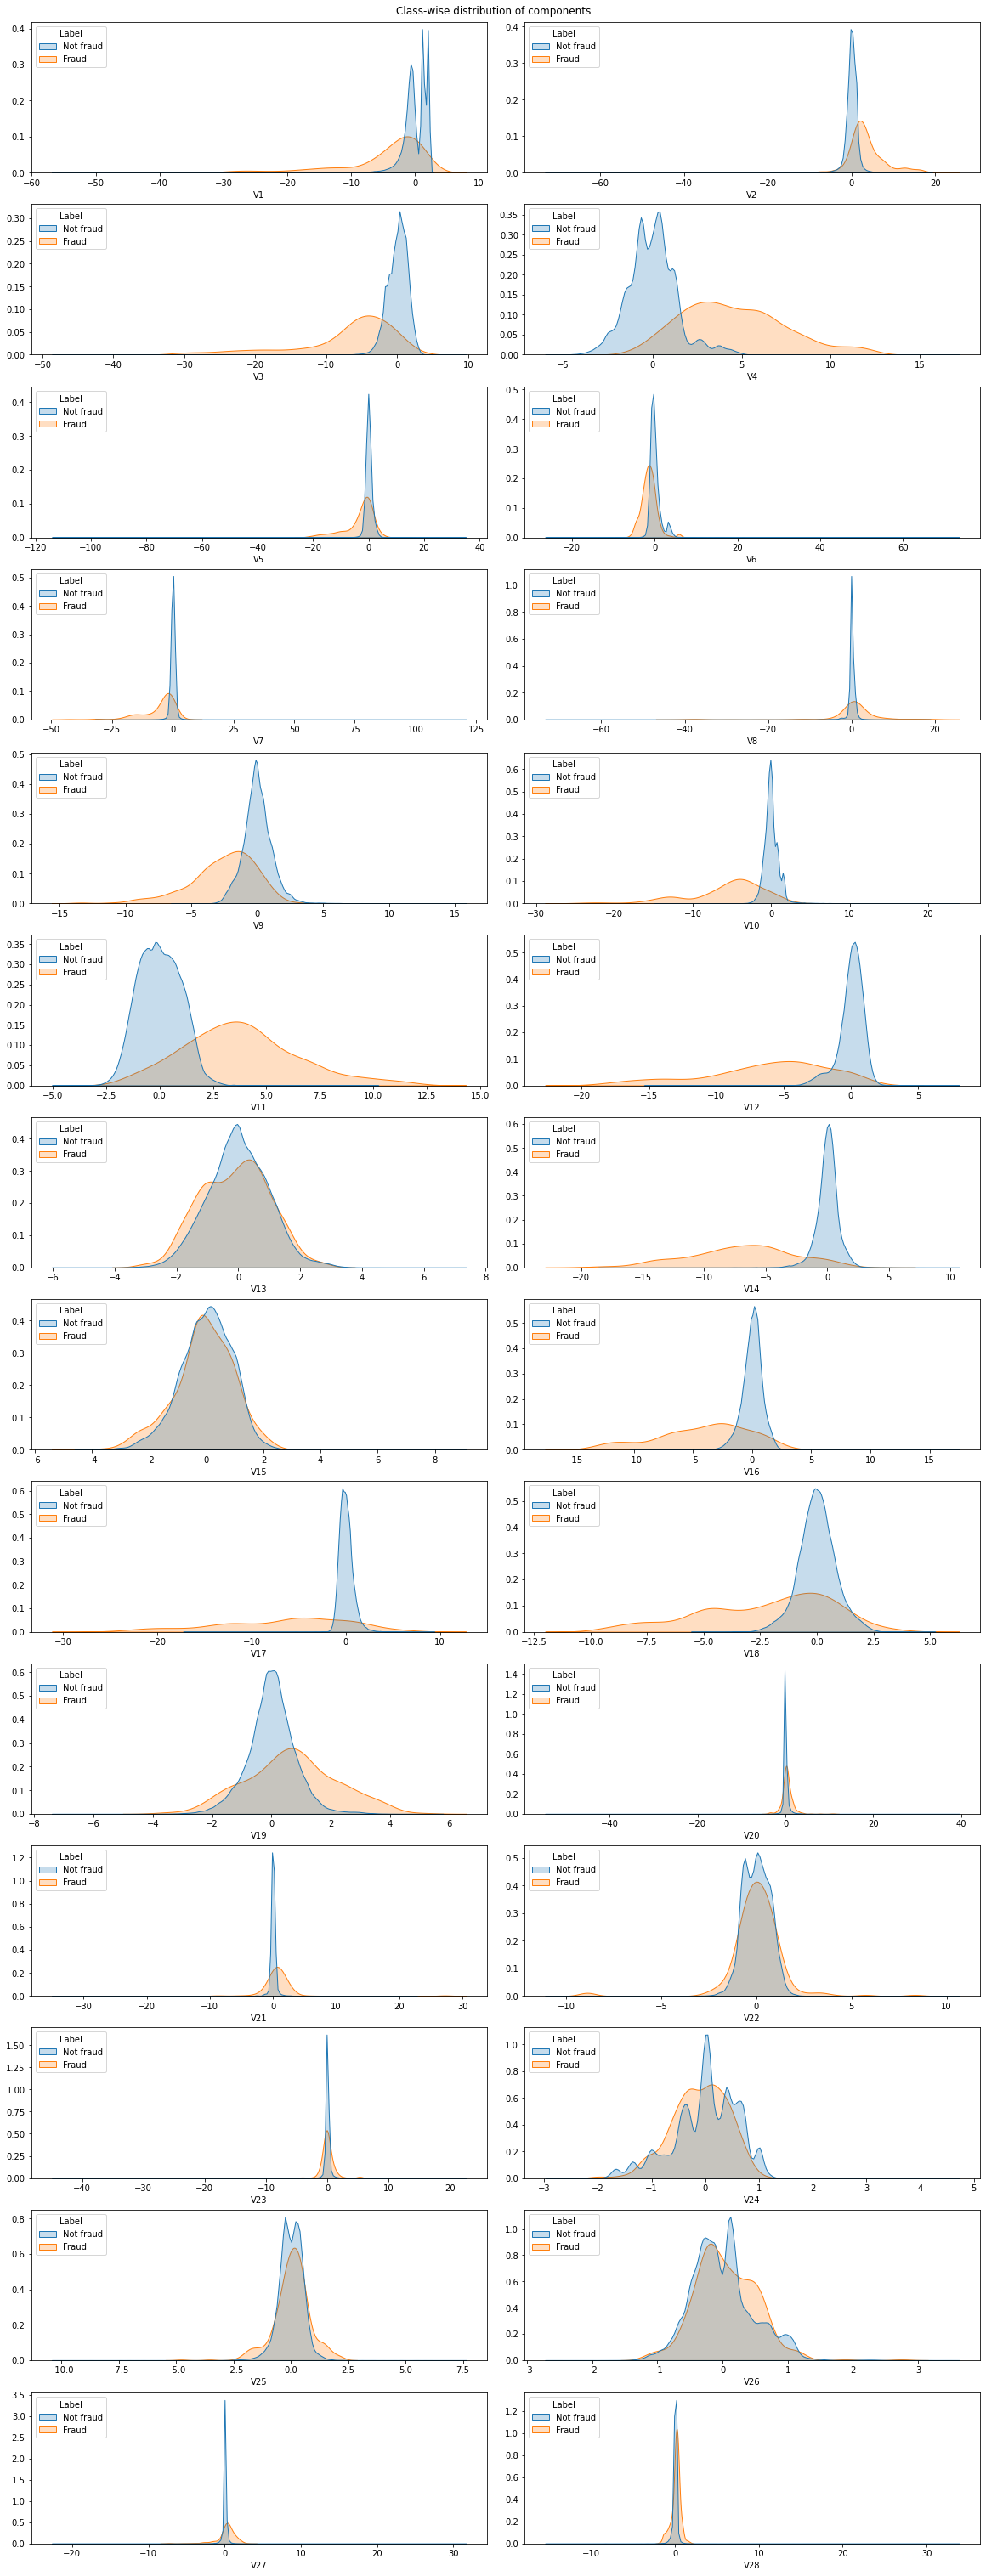

In [25]:
N = 28 # number of components V1...V28
fig, axs = plt.subplots(int(N/2), 2, figsize=(8*2, 3*N/2), constrained_layout=True)

for n in range(N):
    sns.kdeplot(data=df, x=f"V{n+1}", hue="Label",  fill=True, common_norm=False, ax=axs[int(n/2)][n%2])
    axs[int(n/2)][n%2].set_xlabel(f'V{n+1}')
    axs[int(n/2)][n%2].set_ylabel('')
    sns.move_legend(axs[int(n/2)][n%2], "upper left")

fig.suptitle("Class-wise distribution of components")
plt.show()

## Data preprocessing